In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path

In [ ]:
#sys.path.append(str(Path("..") / "03_src"))

In [4]:
import utils

In [66]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

pd.set_option('display.max_columns', None)

In [7]:
orders_enriched = pd.read_csv(utils.path() + "\\03_curated\\orders_enriched.csv")

In [8]:
seller_kpis = (
    orders_enriched.groupby("seller_id").agg(
        order_volume = ('order_id','count'),
        avg_processing_time = ("processing_time",'mean'),
        avg_shipping_time = ('shipping_time','mean'),
        avg_delivery_time = ('delivery_time','mean'),
        late_delivery_count = ("late_delivery_flag",'sum'),
        extreme_delivery_count = ('extreme_delivery_flag','sum')
    ).reset_index()
)

In [9]:
seller_kpis['late_delivery_rate'] = (seller_kpis['late_delivery_count'] / seller_kpis['order_volume']) * 100
seller_kpis['extreme_delivery_rate'] = (seller_kpis['extreme_delivery_count'] / seller_kpis['order_volume']) * 100


In [10]:
seller_kpis[['avg_processing_time', 'avg_shipping_time', 'avg_delivery_time', 'late_delivery_rate', 'extreme_delivery_rate']] = \
    seller_kpis[['avg_processing_time', 'avg_shipping_time', 'avg_delivery_time', 'late_delivery_rate', 'extreme_delivery_rate']].round(2)


In [11]:
seller_kpis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               2951 non-null   object 
 1   order_volume            2951 non-null   int64  
 2   avg_processing_time     2951 non-null   float64
 3   avg_shipping_time       2951 non-null   float64
 4   avg_delivery_time       2951 non-null   float64
 5   late_delivery_count     2951 non-null   int64  
 6   extreme_delivery_count  2951 non-null   int64  
 7   late_delivery_rate      2951 non-null   float64
 8   extreme_delivery_rate   2951 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 207.6+ KB


In [12]:
regional_kpis = orders_enriched.groupby('customer_state').agg(
    order_volume=('order_id', 'count'),
    avg_delivery_time=('delivery_time', 'mean'),
    late_delivery_count=('late_delivery_flag', 'sum')
).reset_index()

regional_kpis['late_delivery_rate'] = (regional_kpis['late_delivery_count'] / regional_kpis['order_volume']).round(2)

regional_kpis.sort_values('late_delivery_rate', ascending=False).head()


,customer_state,order_volume,avg_delivery_time,late_delivery_count,late_delivery_rate
1,AL,393,20.424936,83,0.21
9,MA,704,17.607955,125,0.18
24,SE,333,17.555556,51,0.15
16,PI,469,15.886994,66,0.14
5,CE,1259,17.582208,176,0.14


In [13]:
seller_region_kpis = orders_enriched.groupby(['seller_id', 'customer_state']).agg(
    order_volume=('order_id', 'count'),
    avg_delivery_time=('delivery_time', 'mean'),
    late_delivery_count=('late_delivery_flag', 'sum')
).reset_index()

seller_region_kpis['late_delivery_rate'] = (seller_region_kpis['late_delivery_count'] / seller_region_kpis['order_volume']).round(2)

seller_region_kpis.sort_values('late_delivery_rate', ascending=False).head(10)


,seller_id,customer_state,order_volume,avg_delivery_time,late_delivery_count,late_delivery_rate
22,002100f778ceb8431b7a1020ff7ab48f,GO,2,23.0,2,1.0
9,001cca7ae9ae17fb1caed9dfb1094831,PA,1,60.0,1,1.0
21,002100f778ceb8431b7a1020ff7ab48f,ES,1,28.0,1,1.0
16848,fffd5413c0700ac820c7069d66d98c89,ES,2,31.0,2,1.0
16830,ffc470761de7d0232558ba5e786e57b7,SE,1,29.0,1,1.0
16806,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,RJ,1,39.0,1,1.0
2505,236585a4ddb5fea9fa40233e2249ed91,RS,1,7.0,1,1.0
7418,6f892e20a171e98efe17fdb971ff319b,SE,1,46.0,1,1.0
7406,6f892e20a171e98efe17fdb971ff319b,AL,1,41.0,1,1.0
1595,17306570e772e7718c92a562d33f5f1d,BA,1,22.0,1,1.0


## Delivery Delay Distribution

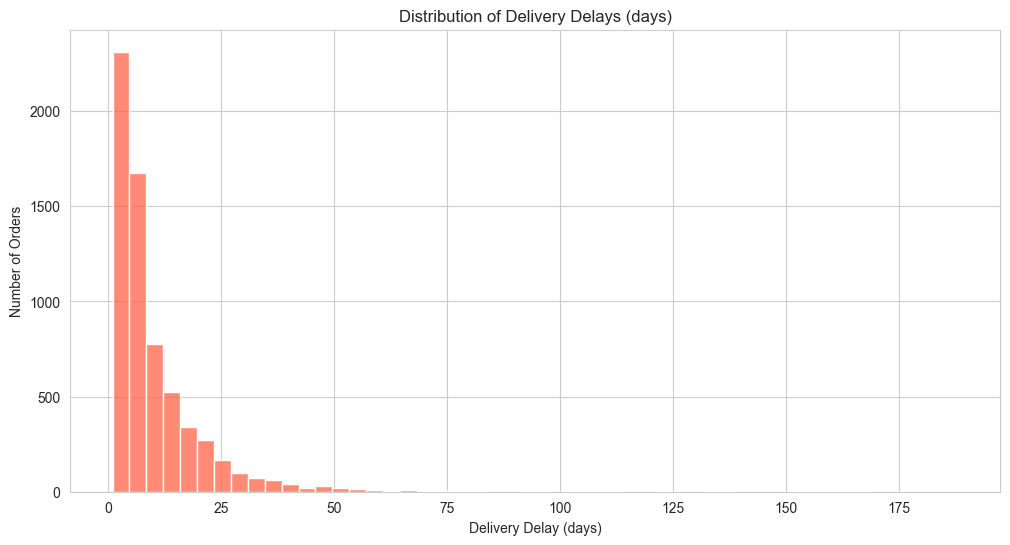

In [34]:
delayed_orders = orders_enriched[orders_enriched['delivery_delay'] > 0]

sns.histplot(delayed_orders['delivery_delay'], bins=50, kde=False, color='tomato')

plt.title('Distribution of Delivery Delays (days)')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Number of Orders')
plt.show()

## Shipping and Delivery Times Boxplot

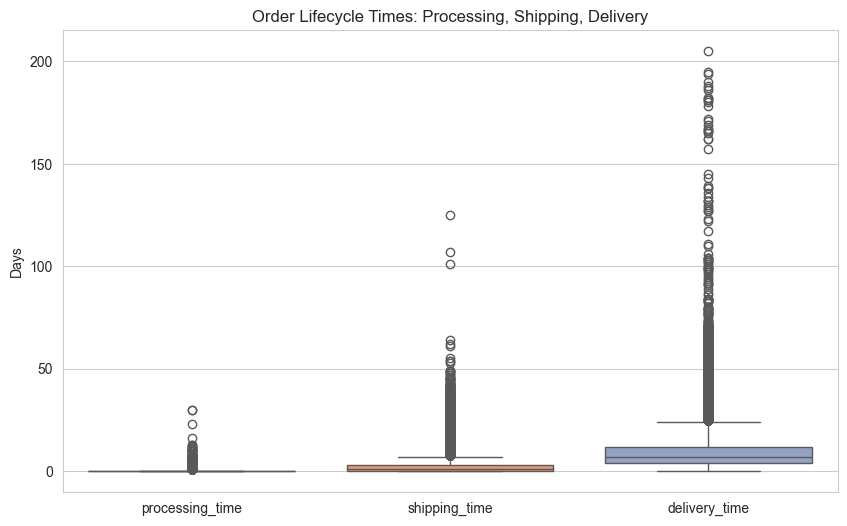

In [ ]:
sns.boxplot(data=orders_enriched[['processing_time','shipping_time','delivery_time']], palette='Set2')

plt.title('Order Lifecycle Times: Processing, Shipping, Delivery')
plt.ylabel('Days')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_22496\2511015626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value',


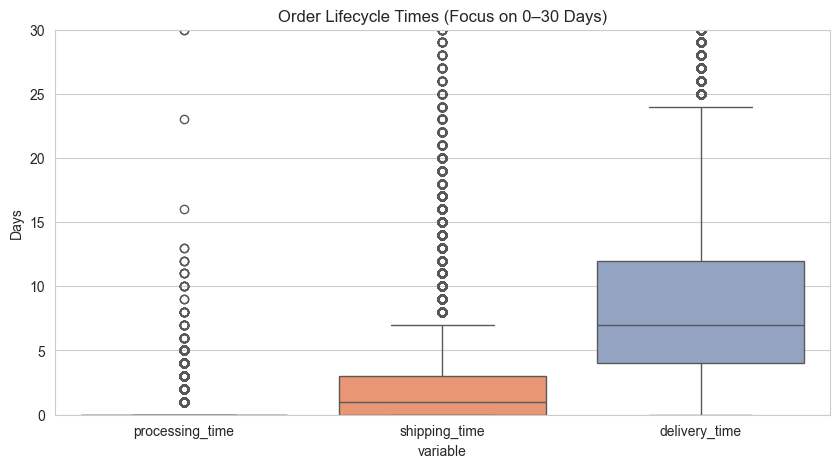

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value',
            data=pd.melt(orders_enriched[['processing_time','shipping_time','delivery_time']]),
            palette='Set2')
plt.ylim(0, 30)  # Zoom in to relevant range
plt.title('Order Lifecycle Times (Focus on 0–30 Days)')
plt.ylabel('Days')
plt.show()


## Top 10 Worst Sellers by Late Delivery Rate

In [65]:
delayed_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'processing_time', 'shipping_time', 'delivery_time', 'IsSlowApproval',
       'extreme_shipping_flag', 'extreme_delivery_flag', 'delivery_delay',
       'late_delivery_flag', 'on_time_delivery', 'seller_id', 'customer_city',
       'customer_state', 'seller_city', 'seller_state'],
      dtype='object')

In [71]:
delayed_orders[delayed_orders['delivery_delay'] > 14]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,shipping_time,delivery_time,IsSlowApproval,extreme_shipping_flag,extreme_delivery_flag,delivery_delay,late_delivery_flag,on_time_delivery,seller_id,customer_city,customer_state,seller_city,seller_state
93,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,0,5,31,False,False,True,17,True,False,4a3ca9315b744ce9f8e9374361493884,rio de janeiro,RJ,ibitinga,SP
105,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,delivered,2017-11-28 21:00:44,2017-12-01 09:31:15,2017-12-14 20:37:43,2018-01-23 21:38:52,2017-12-22,2,13,40,False,False,True,32,True,False,903037660cf848a717166eb7a06d616e,marica,RJ,sao paulo,SP
110,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,delivered,2017-11-26 17:49:46,2017-11-26 17:58:34,2017-11-28 23:17:09,2018-01-20 13:42:22,2017-12-19,0,2,52,False,False,True,32,True,False,4a3ca9315b744ce9f8e9374361493884,sao joao de meriti,RJ,ibitinga,SP
241,f31535f21d145b2345e2bf7f09d62322,ed532487db04478dfba09d112649fc13,delivered,2018-02-01 07:47:34,2018-02-01 08:10:31,2018-02-02 00:24:34,2018-04-23 15:49:34,2018-03-05,0,0,80,False,False,True,49,True,False,91f0eec23d4a61d7d7caeefa3f0ad1ca,niteroi,RJ,tubarao,SC
424,690199d6a2c51ff57c6b392d7680cbfd,19bacb562bd43bd4eaf05b6c0a59dad0,delivered,2018-03-16 11:31:18,2018-03-16 11:49:14,2018-03-19 19:56:23,2018-05-14 12:28:56,2018-04-11,0,3,55,False,False,True,33,True,False,cc419e0650a3c5ba77189a1882b7556a,alto sao joao,PR,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94398,63fd40b25ac9dbeea8ec6b26558a1add,23e74e2cca6193a0e238483464222068,delivered,2018-02-11 17:49:44,2018-02-11 18:08:18,2018-02-14 21:38:58,2018-04-20 23:08:27,2018-03-09,0,3,65,False,False,True,42,True,False,d50d79cb34e38265a8649c383dcffd48,rio de janeiro,RJ,sao paulo,SP
94434,32fef9bb0f0402350b640eb6f13dbe09,28c857caf2f37bb8751725b85dac2481,delivered,2018-03-07 06:46:21,2018-03-08 02:15:43,2018-03-08 19:54:23,2018-05-03 00:39:55,2018-03-29,0,0,55,False,False,True,35,True,False,edb1ef5e36e0c8cd84eb3c9b003e486d,ipatinga,MG,teresopolis,RJ
94748,31a7dd4d08e48968ab49478c64c7075a,f2ad8c1d461bb9d11944d8ab973f3836,delivered,2018-01-14 17:18:45,2018-01-16 03:39:56,2018-02-09 16:38:01,2018-02-14 16:07:43,2018-01-30,1,24,4,False,False,False,15,True,False,c990d6cf976a5718aaedc539f383ab88,diadema,SP,paulinia,SP
94771,4a4ded48a84c0cee9a190dd22ce96866,2b22da03dd8511de17c84238e49082f9,delivered,2017-12-28 21:32:44,2017-12-29 02:09:39,2018-01-03 15:38:32,2018-02-25 14:54:29,2018-01-30,0,5,52,False,False,True,26,True,False,dd2bdf855a9172734fbc3744021ae9b9,petropolis,RJ,belo horizonte,MG


In [68]:
delayed_orders[delayed_orders['extreme_delivery_flag']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,shipping_time,delivery_time,IsSlowApproval,extreme_shipping_flag,extreme_delivery_flag,delivery_delay,late_delivery_flag,on_time_delivery,seller_id,customer_city,customer_state,seller_city,seller_state
93,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,0,5,31,False,False,True,17,True,False,4a3ca9315b744ce9f8e9374361493884,rio de janeiro,RJ,ibitinga,SP
105,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,delivered,2017-11-28 21:00:44,2017-12-01 09:31:15,2017-12-14 20:37:43,2018-01-23 21:38:52,2017-12-22,2,13,40,False,False,True,32,True,False,903037660cf848a717166eb7a06d616e,marica,RJ,sao paulo,SP
110,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,delivered,2017-11-26 17:49:46,2017-11-26 17:58:34,2017-11-28 23:17:09,2018-01-20 13:42:22,2017-12-19,0,2,52,False,False,True,32,True,False,4a3ca9315b744ce9f8e9374361493884,sao joao de meriti,RJ,ibitinga,SP
241,f31535f21d145b2345e2bf7f09d62322,ed532487db04478dfba09d112649fc13,delivered,2018-02-01 07:47:34,2018-02-01 08:10:31,2018-02-02 00:24:34,2018-04-23 15:49:34,2018-03-05,0,0,80,False,False,True,49,True,False,91f0eec23d4a61d7d7caeefa3f0ad1ca,niteroi,RJ,tubarao,SC
331,f11e9516ca2b6091b64f2e2ea0ebebb3,7d527c98f408420a9d5c953e5b89215e,delivered,2018-02-22 20:53:14,2018-02-22 21:28:02,2018-02-23 23:19:09,2018-03-28 22:04:44,2018-03-19,0,1,32,False,False,True,9,True,False,4869f7a5dfa277a7dca6462dcf3b52b2,tres coracoes,MG,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94612,a249134c21e6cc24928060768941584e,9c0dc29335ab059ac917c36e8ad57ee0,delivered,2018-02-11 14:27:27,2018-02-11 14:48:25,2018-02-15 20:33:29,2018-03-21 16:03:48,2018-03-14,0,4,33,False,False,True,7,True,False,b2479f944e1b90cf8a5de1bbfde284d6,porto alegre,RS,ibitinga,SP
94737,4f2a29346d25613d2e553a8d6381b006,3043e244f2c35c95554a613c30a7a332,delivered,2018-03-15 23:18:16,2018-03-15 23:28:29,2018-03-16 19:28:48,2018-04-20 11:12:30,2018-04-10,0,0,34,False,False,True,10,True,False,5dceca129747e92ff8ef7a997dc4f8ca,barreiras,BA,santa barbara d´oeste,SP
94771,4a4ded48a84c0cee9a190dd22ce96866,2b22da03dd8511de17c84238e49082f9,delivered,2017-12-28 21:32:44,2017-12-29 02:09:39,2018-01-03 15:38:32,2018-02-25 14:54:29,2018-01-30,0,5,52,False,False,True,26,True,False,dd2bdf855a9172734fbc3744021ae9b9,petropolis,RJ,belo horizonte,MG
95064,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,1,3,35,False,False,True,21,True,False,fa40cc5b934574b62717c68f3d678b6d,araraquara,SP,sao paulo,SP


In [67]:
delayed_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,shipping_time,delivery_time,IsSlowApproval,extreme_shipping_flag,extreme_delivery_flag,delivery_delay,late_delivery_flag,on_time_delivery,seller_id,customer_city,customer_state,seller_city,seller_state
18,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,0,17,3,False,False,False,11,True,False,633ecdf879b94b5337cca303328e4a25,sao paulo,SP,sao paulo,SP
23,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,1,4,22,False,False,False,9,True,False,c0563dd588b775f2e37747ef6ad6c92c,rio de janeiro,RJ,santo andre,SP
39,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,0,18,14,False,False,False,7,True,False,f5f46307a4d15880ca14fab4ad9dfc9b,presidente venceslau,SP,rio do sul,SC
54,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,0,5,19,False,False,False,1,True,False,db4350fd57ae30082dec7acbaacc17f9,aracaju,SE,sao paulo,SP
55,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30,0,8,14,False,False,False,7,True,False,391fc6631aebcf3004804e51b40bcf1e,campinas,SP,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95039,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,0,12,5,False,False,False,5,True,False,5b0cc932433fa5184b5b94bfe6bcc256,maua,SP,ibitinga,SP
95040,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,0,0,22,False,False,False,3,True,False,620c87c171fb2a6dd6e8bb4dec959fc6,sao paulo,SP,petropolis,RJ
95064,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,1,3,35,False,False,True,21,True,False,fa40cc5b934574b62717c68f3d678b6d,araraquara,SP,sao paulo,SP
95066,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,0,1,19,False,False,False,2,True,False,701938c450705b8ae65fc923b70f35c7,valinhos,SP,s jose do rio preto,SP


In [48]:
top_sellers_late = seller_kpis.sort_values('late_delivery_rate', ascending=False)


In [49]:
top_sellers_late['impact_score'] = top_sellers_late['late_delivery_rate'] * top_sellers_late['order_volume']
top_sellers_late = top_sellers_late.sort_values('impact_score', ascending=False).head(10)


In [52]:
# Define bins and labels
bins = [0, 0.25, 0.5, 0.75, 1.0]  # 0-25%, 25-50%, 50-75%, 75-100%
labels = ['Mostly on-time', 'Minor delays', 'Moderate delays', 'Severe delays']

# Create a categorical column
seller_kpis['late_delivery_class'] = pd.cut(seller_kpis['late_delivery_rate'],
                                            bins=bins,
                                            labels=labels,
                                            include_lowest=True)

In [53]:
# Count of sellers per class
class_counts = seller_kpis['late_delivery_class'].value_counts().sort_index()

In [58]:
orders_enriched['late_delivery_flag'].value_counts()

late_delivery_flag
False    88573
True      6509
Name: count, dtype: int64

In [55]:
class_counts

late_delivery_class
Mostly on-time     1684
Minor delays          0
Moderate delays       1
Severe delays         5
Name: count, dtype: int64

In [59]:
seller_kpis_filtered = seller_kpis[seller_kpis['order_volume'] >= 10]


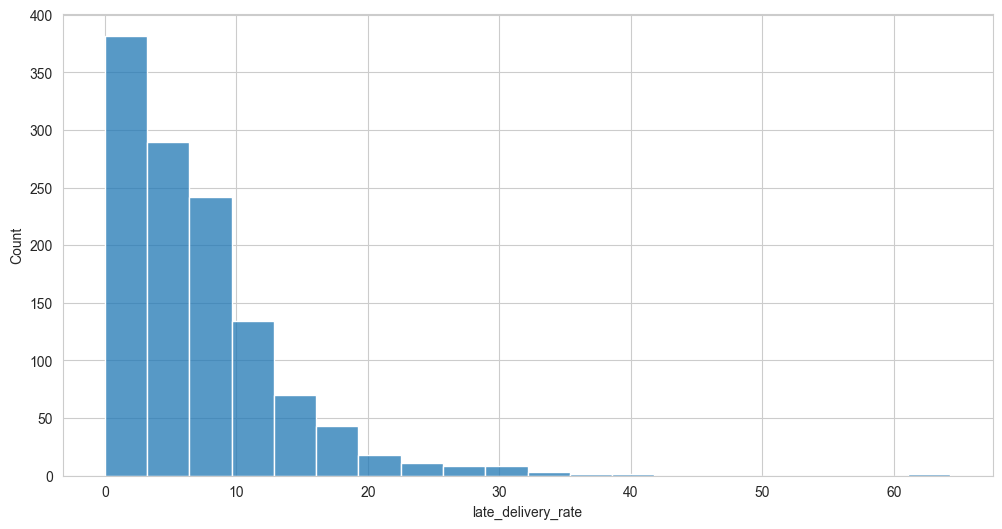

In [60]:
sns.histplot(seller_kpis_filtered['late_delivery_rate'], bins=20)
plt.show()


In [61]:
bins = [0, 0.05, 0.1, 0.25, 0.5, 1.0]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Severe']
seller_kpis_filtered['late_delivery_class'] = pd.cut(
    seller_kpis_filtered['late_delivery_rate'], bins=bins, labels=labels
)
seller_kpis_filtered['late_delivery_class'].value_counts()


C:\Users\acer\AppData\Local\Temp\ipykernel_22496\165817430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_kpis_filtered['late_delivery_class'] = pd.cut(


late_delivery_class
Severe      6
Very Low    0
Low         0
Moderate    0
High        0
Name: count, dtype: int64

C:\Users\acer\AppData\Local\Temp\ipykernel_22496\3216533962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Reds_r')


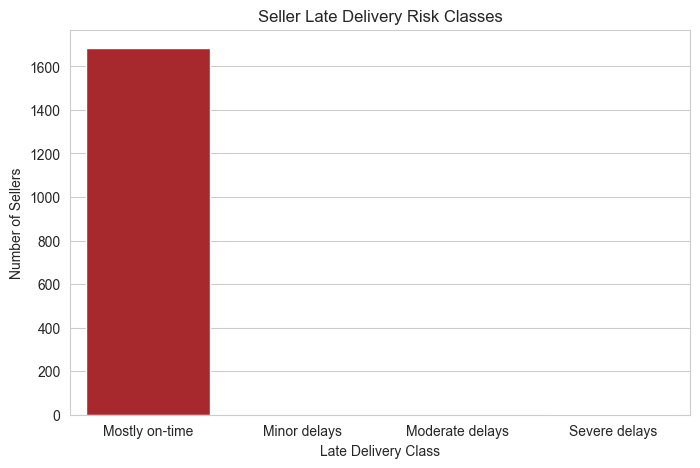

In [54]:
# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Reds_r')
plt.title('Seller Late Delivery Risk Classes')
plt.ylabel('Number of Sellers')
plt.xlabel('Late Delivery Class')
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_22496\3866723233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_id', y='impact_score', data=top_sellers_late, palette='Reds_r')


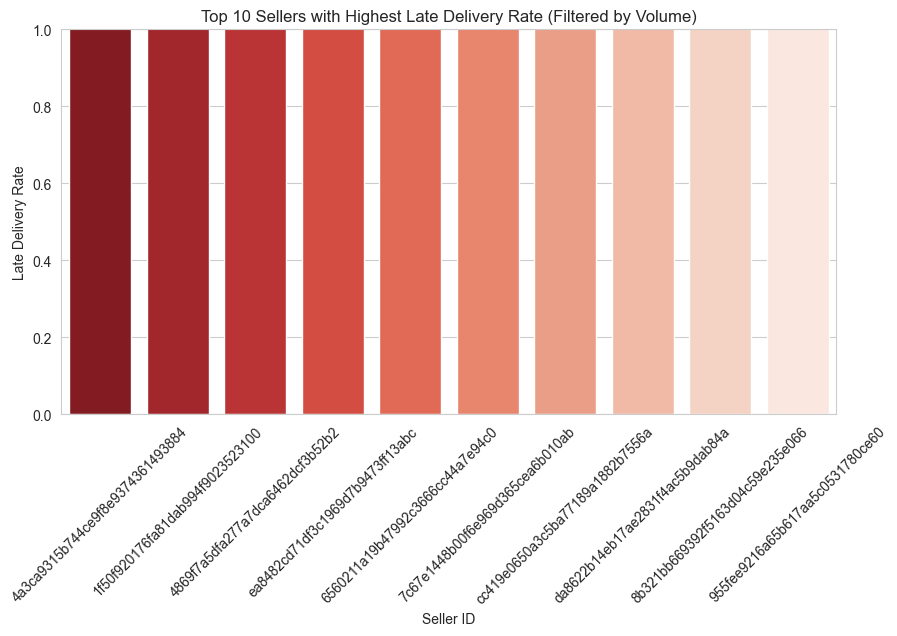

In [ ]:

sns.barplot(x='seller_id', y='impact_score', data=top_sellers_late, palette='Reds_r')

plt.xticks(rotation=45)
plt.title('Top 10 Sellers with Highest Late Delivery Rate (Filtered by Volume)')
plt.ylabel('Late Delivery Rate')
plt.xlabel('Seller ID')
plt.ylim(0,1)  # Keep consistent scale
plt.show()


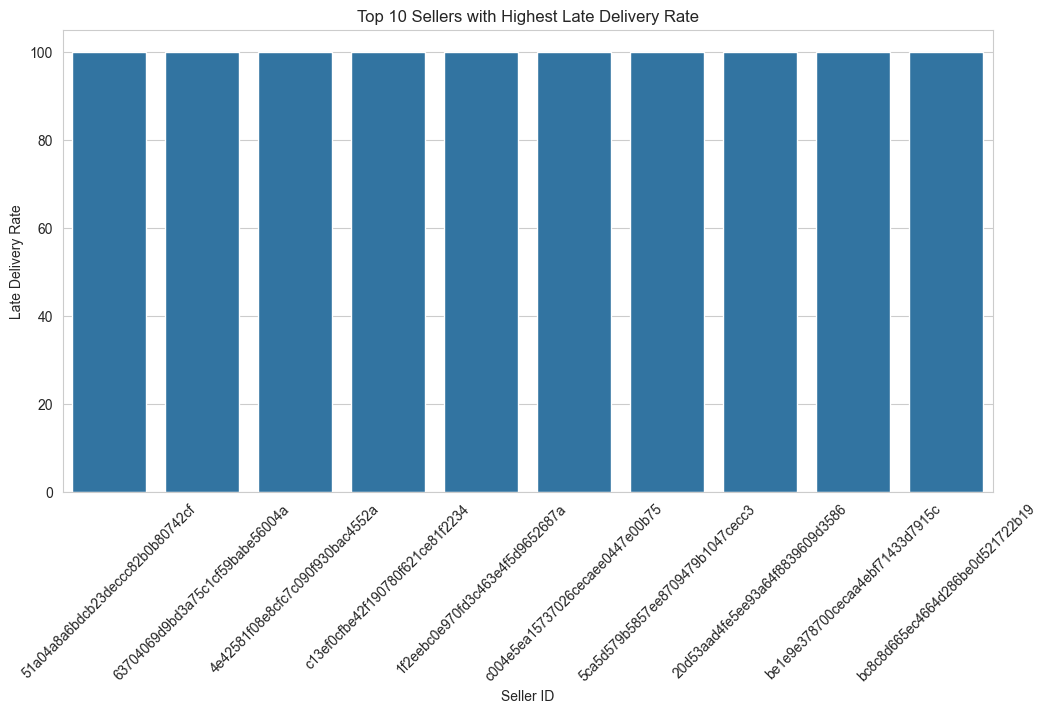

In [ ]:

sns.barplot(x='seller_id', y='late_delivery_rate', data=top_sellers_late)

plt.xticks(rotation=45)
plt.title('Top 10 Sellers with Highest Late Delivery Rate')
plt.ylabel('Late Delivery Rate')
plt.xlabel('Seller ID')
plt.show()

## Regional Performance: Avg Delivery Time by Customer State

In [19]:
regional_kpis = orders_enriched.groupby('customer_state').agg(
    avg_delivery_time=('delivery_time','mean'),
    late_delivery_rate=('late_delivery_flag','mean')
).reset_index()

C:\Users\acer\AppData\Local\Temp\ipykernel_22496\742627469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='avg_delivery_time', data=regional_kpis_sorted, palette='Blues_r')


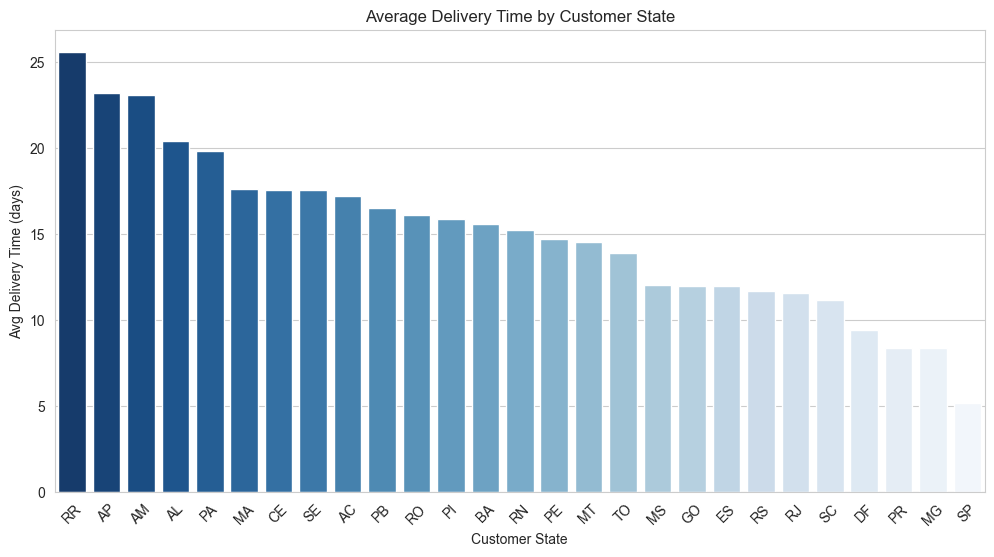

In [20]:
# Heatmap-style barplot
regional_kpis_sorted = regional_kpis.sort_values('avg_delivery_time', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='customer_state', y='avg_delivery_time', data=regional_kpis_sorted, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('Average Delivery Time by Customer State')
plt.ylabel('Avg Delivery Time (days)')
plt.xlabel('Customer State')
plt.show()

## Regional Late Delivery Rate

C:\Users\acer\AppData\Local\Temp\ipykernel_22496\2678924798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='late_delivery_rate', data=regional_kpis_sorted, palette='Oranges_r')


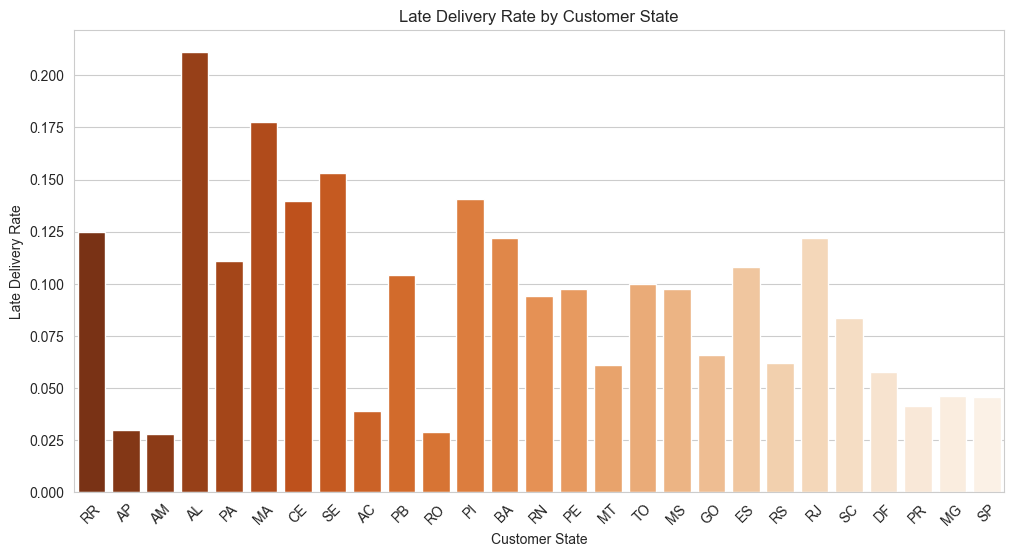

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='customer_state', y='late_delivery_rate', data=regional_kpis_sorted, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('Late Delivery Rate by Customer State')
plt.ylabel('Late Delivery Rate')
plt.xlabel('Customer State')
plt.show()

## Extreme Delivery Outliers

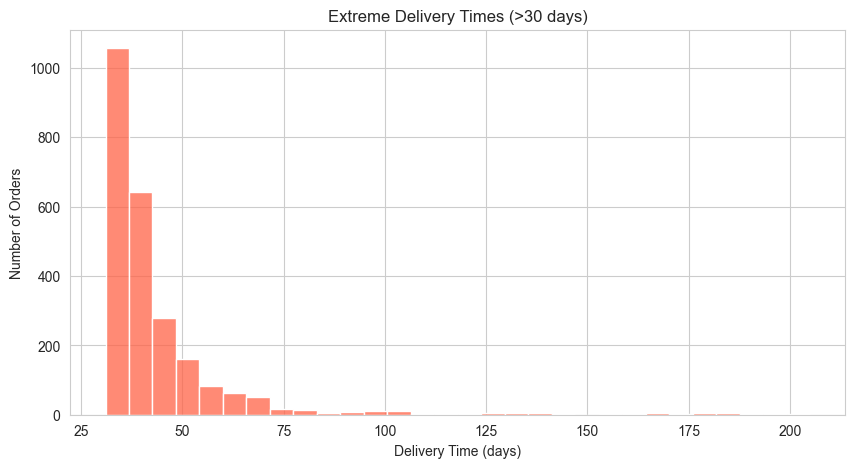

In [22]:
extreme_orders = orders_enriched[orders_enriched['extreme_delivery_flag']]
plt.figure(figsize=(10,5))
sns.histplot(extreme_orders['delivery_time'], bins=30, color='tomato')
plt.title('Extreme Delivery Times (>30 days)')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Number of Orders')
plt.show()